Ans 1.

Multiplications = (k * m) * n

Additions = (k-1) * m * n

The resultant matrix after multiplication of a (n,k) and (k,m) matrix is a (n,m) matrix.

Each row of first matrix is multiplied element wise with each column of the second matrix and then added to give the element of that respective column in the resultant matrix.
The additions are one less for each elemeent of resultant matrix.

Ans 2.

In [67]:
import timeit
import numpy as np
n = 2
m = 3
k = 4
A = np.random.randint(1, 10, size=(n,k))
B = np.random.randint(1, 10, size=(k,m))

def print_matrix(C):
    # print(C[n-1][m-1])
    for x in range(n):
        for y in range(m):
            print(C[x][y], end=' ')
            if(y == m-1):
                print('\n')

In [68]:
# Multiplying matrix A and B and storing in matrix C using nested for loops.

def multiplication_for_loops(A,B,n,m,k):
  C1 = [[0]*m for _ in range(n)]
  for x in range(n):
      for y in range(m):
          for z in range(k):
              C1[x][y] += (A[x][z] * B[z][y])
  return C1

# print_matrix(multiplication_for_loops(A,B,n,m,k))

# Multiplying matrix A and B and storing in matrix C using numpy.

def multiplication_numpy(A,B,n,m,k):
  C2 = np.dot(A,B)
  return C2

# print_matrix(multiplication_numpy(A,B,n,m,k))

In [69]:
%%timeit -r 3 -n 2000
multiplication_for_loops(A,B,n,m,k)

22 µs ± 2.65 µs per loop (mean ± std. dev. of 3 runs, 2000 loops each)


In [70]:
%%timeit -r 3 -n 2000
multiplication_numpy(A,B,n,m,k)

2.22 µs ± 1.07 µs per loop (mean ± std. dev. of 3 runs, 2000 loops each)


The matrix multiplication using numpy is faster and this difference grows exponentially for a larger dataset(i.e. matrix shapes).

numpy uses vectorized dot product to multiply the matrices which decreases the time complexity by many folds.

Ans 3.

Median of a list is the middle most element of the sorted list.
Let the number of elements be n.

Case 1: n is Odd

Median = $(\frac{n+1}{2})^{th}$ element

Case 2: n is Even

Median = Average of $(\frac{n}{2})^{th}$ and $(\frac{n}{2} + 1)^{th}$ element

To find the median highest element in the list it would require $(\frac{n+1}{2})$ or $(\frac{n}{2} + 1)$ passes of the array according to the number of elements.
Therefore, the time complexity of this method is O($n^{2}$).


Instead of the above method, we can use sorting to first sort the list. This can be done using the inbuilt sort() function in Python in O(nlogn) time and the we can just output the median element according to n (even or odd, as explained in cases above) which takes O(1) time. 

Therefore, the time complexity of this method will be O(nlogn) + O(1) = O(nlogn).

In [71]:
import random
import timeit
import numpy as np

n = 100
lst = random.sample(range(1, 200), n)

In [72]:
import sys

# Method 1: Array Pass Method

def median_array_pass(lst, n):
  idx = 0
  used_idx = []

  if(n%2):
    for j in range(int((n+1)/2)):
      max_num = -sys.maxsize - 1
      for i in range(n):
        if(lst[i]>=max_num and i not in used_idx):
          max_num = lst[i]
          idx = i
      used_idx.append(idx)
    median = max_num
  else:
    for j in range(int(n/2)+1):
      if(j == int(n/2)):
        last_max = max_num
      max_num = -sys.maxsize - 1
      for i in range(n):
        if(lst[i]>=max_num and i not in used_idx):
          max_num = lst[i]
          idx = i
      used_idx.append(idx)
    median = (max_num + last_max)/2
    return median

print("The Median using Method 1 is: ", median_array_pass(lst, n))

# Method 2: Sorting Method

def median_sorting(lst,n):
  lst.sort()
  if(n%2):
    median = lst[int((n+1)/2)-1]
  else:
    median = (lst[int(n/2)] + lst[int(n/2)-1])/2

  return median

print("The Median using Method 2 is: ",median_sorting(lst,n))

# Method 3: Numpy median Method

def median_numpy(lst):
  median = np.median(lst)
  return median

print("The Median using Method 3 is: ",median_numpy(lst))

The Median using Method 1 is:  97.5
The Median using Method 2 is:  97.5
The Median using Method 3 is:  97.5


In [73]:
%%timeit -r 3 -n 2000
median_array_pass(lst,n)

2.31 ms ± 199 µs per loop (mean ± std. dev. of 3 runs, 2000 loops each)


In [74]:
%%timeit -r 3 -n 2000
median_sorting(lst,n)

1.95 µs ± 939 ns per loop (mean ± std. dev. of 3 runs, 2000 loops each)


In [75]:
%%timeit -r 3 -n 2000
median_numpy(lst)

32.5 µs ± 2.31 µs per loop (mean ± std. dev. of 3 runs, 2000 loops each)


On comparison of runtime, it is observed that the best runtime is that of sorting the array first and then finding the median eleemnt acoording to the rule, followed by the np.median method , followed by the Array Pass Method.

Ans 4.

Let f(x) = $x^{2}$y + $y^{3}$sin(x)

$\frac{df(x)}{dx}$ = 2xy + $y^{3}$cos(x)

$\frac{df(x)}{dy}$ = $x^{2}$ + $3y^{2}$sin(x)

Ans 5.

In [76]:
import random
import numpy as np
import jax.numpy as jnp
from jax import grad

# Function f
def f(x, y):
  return x**2 * y + y**3 * jnp.sin(x)

# df/dx
def df_dx(x, y):
  return 2*x*y + y**3 * jnp.cos(x)

# df/dy
def df_dy(x, y):
  return x**2 + 3 * y**2 * jnp.sin(x)

grad_x = grad(f, argnums=0)
grad_y = grad(f, argnums=1)

x = np.random.uniform(1,10,(5))
y = np.random.uniform(1,10,(5))
err = 1e-3

for i in range(5):
  print(grad_x(x[i],y[i]),", ",df_dx(x[i],y[i]))
  print(grad_y(x[i],y[i]),", ",df_dy(x[i],y[i]))
  if(abs(grad_x(x[i],y[i]) - df_dx(x[i],y[i]))>err or 
     abs(grad_y(x[i],y[i]) - df_dy(x[i],y[i]))>err):
    print("Gradients do not match!")
  else:
    print("Gradient Match!")



-327.49777 ,  -327.4978
284.64478 ,  284.64478
Gradient Match!
2.608963 ,  2.608964
12.87768 ,  12.87768
Gradient Match!
500.29688 ,  500.29688
297.3652 ,  297.36517
Gradient Match!
-87.83429 ,  -87.83428
-67.23526 ,  -67.23526
Gradient Match!
-520.598 ,  -520.598
-108.29447 ,  -108.29449
Gradient Match!


Therefore, the gradient evaluated in Q4 matches the analytical solution corresponding to a few random values of x and y

Ans 6.

In [77]:
import sympy

x, y = sympy.symbols('x y')
f = x**2*y + y**3*sympy.sin(x)
gradient = sympy.Matrix([f]).jacobian([x, y])

print(gradient)

Matrix([[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]])


Ans 7.

In [78]:
students = {
    2022:{
        'Branch 1':[
            {
              'Roll Number': 1, 
              'Name': 'N', 
              'Marks': {
                  'Maths':100, 
                  'English':70
                  }
            }
        ], 
        'Branch 2':[]
    },
    2023:{
        'Branch 1':[],
        'Branch 2':[]
    },
    2024:{
        'Branch 1':[],
        'Branch 2':[]
    },
    2025:{
        'Branch 1':[],
        'Branch 2':[]
    },
}

Ans 8.

In [79]:
class Student():
  def __init__(self, roll_no, name, marks):
    self.roll_no = roll_no
    self.name = name
    self.marks = marks

class Branch(Student):
  def __init__(self, branches, students):
    self.branches = branches
    self.students = students

class Year(Branch):
  def __init__(self, year, branches):
    self.year = year
    self.branches = branches

class Database(Year):
  def __init__(self, years):
    self.years = years

database = Database([
    Year(2022, [
        Branch("Branch 1", [
            Student(1, "N", {"Maths":100, "English":70})
        ]),
        Branch("Branch 2",[])
    ]),
    Year(2023, [
        Branch("Branch 1",[]),
        Branch("Branch 2",[])
    ]),
    Year(2024, [
        Branch("Branch 1",[]),
        Branch("Branch 2",[])
    ]),
    Year(2025, [
        Branch("Branch 1",[]),
        Branch("Branch 2",[])
    ])
])

for year in database.years:
    print("Year:", year.year)
    for branch in year.branches:
        print("  Branch:", branch.branches)
        for student in branch.students:
            print("    Roll Number: ",student.roll_no, ", Name: ",student.name, ", Marks: ")
            print("     ",end='')
            for subject,marks in student.marks.items():
              print(subject,": ",marks,", ",end='')
            print('\n')



Year: 2022
  Branch: Branch 1
    Roll Number:  1 , Name:  N , Marks: 
     Maths :  100 , English :  70 , 

  Branch: Branch 2
Year: 2023
  Branch: Branch 1
  Branch: Branch 2
Year: 2024
  Branch: Branch 1
  Branch: Branch 2
Year: 2025
  Branch: Branch 1
  Branch: Branch 2


Ans 9.

In [80]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0.5,100.0,200) # 200 denotes number of steps instead of step size

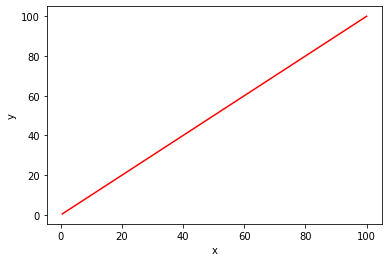

In [81]:
y = x

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# plot the function
plt.plot(x,y, 'r')
plt.xlabel("x")
plt.ylabel("y")

plt.show()

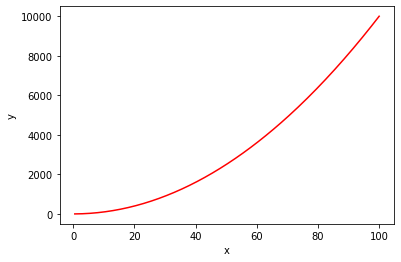

In [82]:
y = x**2

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# plot the function
plt.plot(x,y, 'r')
plt.xlabel("x")
plt.ylabel("y")

plt.show()

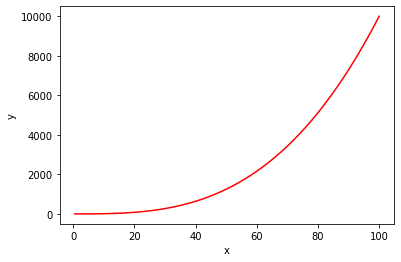

In [83]:
y = (x**3)/100

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# plot the function
plt.plot(x,y, 'r')
plt.xlabel("x")
plt.ylabel("y")

plt.show()

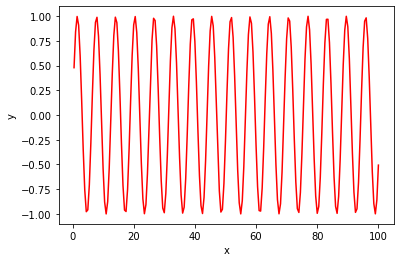

In [84]:
y = np.sin(x)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# plot the function
plt.plot(x,y, 'r')
plt.xlabel("x")
plt.ylabel("y")

plt.show()

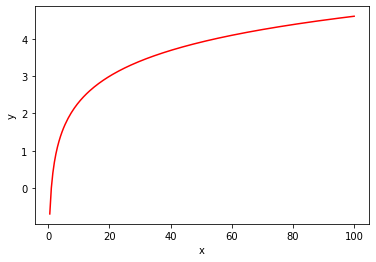

In [85]:
y = np.log(x)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# plot the function
plt.plot(x,y, 'r')
plt.xlabel("x")
plt.ylabel("y")

plt.show()

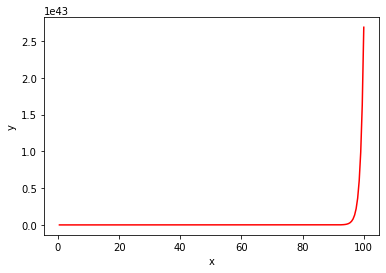

In [86]:
y = np.exp(x)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# plot the function
plt.plot(x,y, 'r')
plt.xlabel("x")
plt.ylabel("y")

plt.show()

Ans 10.

In [87]:
import numpy as np
import pandas as pd
from IPython.display import display

# Let A be that 20X5 matrix with random numbers drawn uniformly from the range 1 to 2
A = np.random.uniform(1, 2, size=(20, 5))

# Creating dataframe with the specified column names
dataframe = pd.DataFrame(A, columns=["a", "b", "c", "d", "e"])

display(dataframe)
col_max_sd = dataframe.std().idxmax()
row_min_mean = dataframe.mean(axis=1).idxmin()

print("The column with the highest standard deviation is: ", col_max_sd)
print("The row with the lowest mean is: ", row_min_mean)

,a,b,c,d,e
0,1.069168,1.000923,1.662102,1.197164,1.452478
1,1.654103,1.228585,1.261568,1.992544,1.655526
2,1.539759,1.440986,1.058698,1.108139,1.240255
3,1.176142,1.800688,1.516381,1.237606,1.007010
4,1.320867,1.717749,1.632098,1.111548,1.013674
5,1.335646,1.766068,1.921766,1.810054,1.594818
6,1.840187,1.124521,1.607414,1.807110,1.727067
7,1.075997,1.412494,1.577461,1.265695,1.065396
8,1.849041,1.508729,1.404936,1.068387,1.588144
9,1.829984,1.439738,1.895496,1.153321,1.615252


The column with the highest standard deviation is:  a
The row with the lowest mean is:  17


Ans 11.

In [88]:
# Creating column "f" as specified
dataframe['f'] = dataframe['a'] + dataframe['b'] + dataframe['c'] + dataframe['d'] + dataframe['e']

# Creating column "g" as specified
dataframe['g'] = np.where(dataframe['f'] < 8, 'LT8', 'GT8')

display(dataframe)

# No. of rows with value in 'g' column as LT8
no_LT8 = dataframe[dataframe['g'] == 'LT8'].shape[0]
print("The number of rows where g == LT8 is: ", no_LT8)

# Standard Deviation of column “f” for rows where datframe[g] == “LT8”
sd_LT8 = dataframe[dataframe['g'] == 'LT8']['f'].std()
print("The Standard Deviation of rows g == LT8 is: ", sd_LT8)

# Standard Deviation of column “f” for rows where datframe[g] == “GT8”
sd_GT8 = dataframe[dataframe['g'] == 'GT8']['f'].std()
print("The Standard Deviation of rows g == GT8 is: ", sd_GT8)

,a,b,c,d,e,f,g
0,1.069168,1.000923,1.662102,1.197164,1.452478,6.381835,LT8
1,1.654103,1.228585,1.261568,1.992544,1.655526,7.792326,LT8
2,1.539759,1.440986,1.058698,1.108139,1.240255,6.387837,LT8
3,1.176142,1.800688,1.516381,1.237606,1.007010,6.737828,LT8
4,1.320867,1.717749,1.632098,1.111548,1.013674,6.795937,LT8
5,1.335646,1.766068,1.921766,1.810054,1.594818,8.428353,GT8
6,1.840187,1.124521,1.607414,1.807110,1.727067,8.106299,GT8
7,1.075997,1.412494,1.577461,1.265695,1.065396,6.397044,LT8
8,1.849041,1.508729,1.404936,1.068387,1.588144,7.419236,LT8
9,1.829984,1.439738,1.895496,1.153321,1.615252,7.933791,LT8


The number of rows where g == LT8 is:  15
The Standard Deviation of rows g == LT8 is:  0.6773194728315991
The Standard Deviation of rows g == GT8 is:  0.3331877721150053


Ans 12.

In [89]:
import numpy as np

# Let A is a 3x3 matrix
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Let B is a 1x3 matrix
B = np.array([[10, 15, 20]])

# Performing matrix multiplication
C = A + B

print(C)

[[11 17 23]
 [14 20 26]
 [17 23 29]]


Broadcasting allows users to perform arithmetic operations on arrays of different sizes. 
For arrays with unequal dimensions, it stretches or duplicates the smaller array so that it has the same dimensions as the larger array, and then performs the operation element-wise.

Although there are some basic considerations along with this:


1) NumPy compares the dimensions of the arrays element-wise, starting with the trailing dimensions and working its way forward.

2) For each dimension, if the arrays have the same size, or if one of the arrays has size 1, NumPy continues to the next dimension.

3) If the arrays have different sizes and neither of them has size 1, an error is raised, because the shapes are incompatible.

4) Then the smaller array is stretched, as in the values of the smaller array are duplicated to make it equal to the larger array.

Here, the matrix B is stretched to: 

[[10 15 20]

 [10 15 20]
 
 [10 15 20]]

Ans 13.

In [90]:
import random
import timeit
import numpy as np

n = 100
lst = random.sample(range(1, 200), n)

def argmin(lst,n):
  min_ele = lst[0]
  idx = 0
  for i in range(n):
    if(lst[i]<min_ele):
      min_ele = lst[i]
      idx = i
  return idx

print(argmin(lst,n))

def argmin_compare(lst,n):
  if(np.argmin(lst) != argmin(lst,n)):
    print("False")
    pass


82


In [91]:
%%timeit -r 3 -n 2000
argmin_compare(lst,n)

29.4 µs ± 8.77 µs per loop (mean ± std. dev. of 3 runs, 2000 loops each)


Since the timeit function doesn't print False, it means all values match. Function verified.